Running serial computation...
Serial computation time: 0.43 seconds

Running parallel computation...
Using 24 CPU cores
Parallel computation time: 0.26 seconds
Speedup: 1.66x

Mean spectral radius: 4.7804
Standard deviation: 0.1035
Theoretical Expected largest eigenvalue for N=20: ~4.47


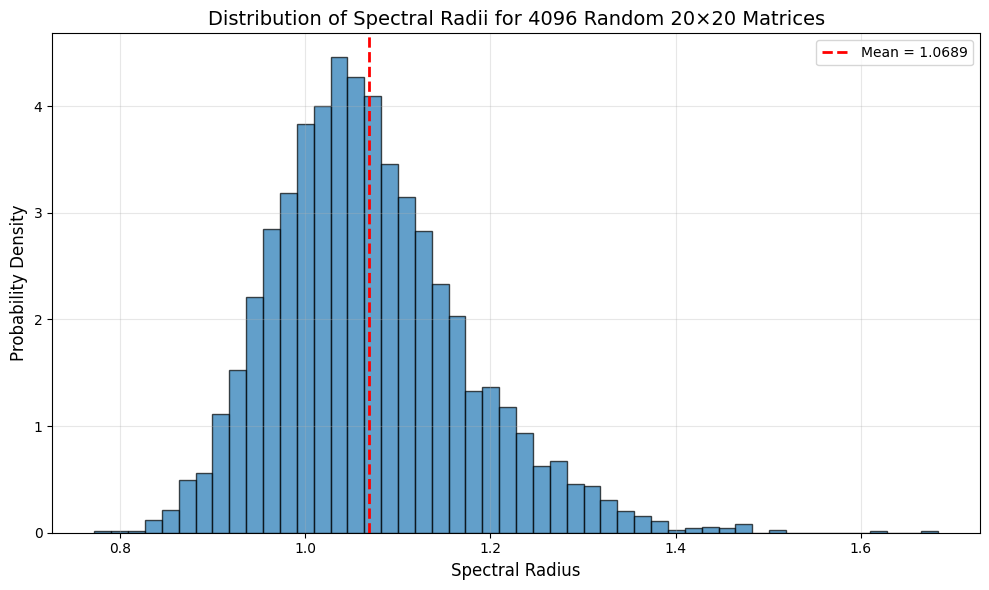


Histogram saved as 'spectral_radius_distribution.png'


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count
import time

def compute_spectral_radius(args):
    """
    Generate a random N×N matrix and compute its spectral radius.

    Parameters:
    -----------
    args : tuple
        (seed, N) where seed is random seed and N is matrix size

    Returns:
    --------
    float : spectral radius (largest absolute eigenvalue)
    """
    seed, N = args
    np.random.seed(seed)
    # Generate random matrix with entries from N(0, 1/sqrt(N))
    matrix = np.random.randn(N, N) / np.sqrt(N)

    # Compute eigenvalues
    eigenvalues = np.linalg.eigvals(matrix)

    # Return spectral radius (largest absolute eigenvalue)
    spectral_radius = np.max(np.abs(eigenvalues))

    return spectral_radius


def parallel_computation(M, N, num_cores=None):
    """
    Compute spectral radii for M random matrices using multiprocessing.

    Parameters:
    -----------
    M : int
        Number of random matrices to generate
    N : int
        Size of each matrix (N×N)
    num_cores : int, optional
        Number of CPU cores to use (default: all available)

    Returns:
    --------
    list : spectral radii for all M matrices
    """
    if num_cores is None:
        num_cores = cpu_count()

    print(f"Using {num_cores} CPU cores")

    # Create a pool of workers
    with Pool(processes=num_cores) as pool:
        # Map the computation across all cores
        # Each core gets a subset of the range(M)
        spectral_radii = pool.map(compute_spectral_radius, [(i, N) for i in range(M)])

    return spectral_radii


def serial_computation(M, N):
    """
    Compute spectral radii for M random matrices serially (no parallelization).

    Parameters:
    -----------
    M : int
        Number of random matrices to generate
    N : int
        Size of each matrix (N×N)

    Returns:
    --------
    list : spectral radii for all M matrices
    """
    spectral_radii = []
    for i in range(M):
        spectral_radii.append(compute_spectral_radius((i, N)))

    return spectral_radii


def main():
    M = 4096 # Number of random matrices
    N = 20    # Matrix size (N×N)

    # Serial computation
    print("Running serial computation...")
    start_time = time.time()
    radii_serial = serial_computation(M, N)
    serial_time = time.time() - start_time
    print(f"Serial computation time: {serial_time:.2f} seconds")

    # Parallel computation
    print("\nRunning parallel computation...")
    start_time = time.time()
    radii_parallel = parallel_computation(M, N)
    parallel_time = time.time() - start_time
    print(f"Parallel computation time: {parallel_time:.2f} seconds")
    print(f"Speedup: {serial_time/parallel_time:.2f}x")

    # Statistical analysis
    mean_radius = np.mean(radii_parallel)
    std_radius = np.std(radii_parallel)
    print(f"\nMean spectral radius: {mean_radius*np.sqrt(N):.4f}")
    print(f"Standard deviation: {std_radius:.4f}")
    print(f"Theoretical Expected largest eigenvalue for N={N}: ~{np.sqrt(N):.2f}")

    # Create histogram
    plt.figure(figsize=(10, 6))
    plt.hist(radii_parallel, bins=50, density=True, alpha=0.7, edgecolor='black')
    plt.axvline(mean_radius, color='red', linestyle='--', linewidth=2,
                label=f'Mean = {mean_radius:.4f}')
    plt.xlabel('Spectral Radius', fontsize=12)
    plt.ylabel('Probability Density', fontsize=12)
    plt.title(f'Distribution of Spectral Radii for {M} Random {N}×{N} Matrices',
              fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('spectral_radius_distribution.png', dpi=300)
    plt.show()

    print("\nHistogram saved as 'spectral_radius_distribution.png'")


if __name__ == "__main__":
    main()